In [1]:
import requests

import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tqdm import tqdm

In [2]:
# List of all labels
labels = ["washing_hands", "shower", "flushing_toilet", "dishwasher", "washing_machine"]

In [3]:
# Get list of all recordings
data = requests.get("https://dolphin-app-9sdeq.ondigitalocean.app/api/v1/recordings").json()

recordings = []

for recording in data:
    recordings.append({
        "path": f'../recordings/combined/{recording["name"]}',
        "label": recording["label"],
        "environment": recording["environment"]
    })

dataframe = pd.json_normalize(recordings)

dataframe.head()

,path,label,environment
0,../recordings/combined/a196dbae-1f50-4d0e-b345...,washing_hands,marsberg
1,../recordings/combined/826e36b1-2a7e-4d22-9c81...,washing_hands,marsberg
2,../recordings/combined/9a6b6b01-e466-47fb-9fcc...,washing_hands,marsberg
3,../recordings/combined/84ee02e6-44d5-4ab3-b875...,washing_hands,marsberg
4,../recordings/combined/ec24c55a-39ec-4b36-86fe...,washing_hands,marsberg


In [4]:
# Extract dataframe for each environment
dataframe_marsberg = dataframe[dataframe["environment"] == "marsberg"]
dataframe_duesseldorf = dataframe[dataframe["environment"] == "duesseldorf"]

In [5]:
# Function to retrieve samples with a specific label from a dataframe
def get_label_samples(n, label, dataframe):
    label_dataframe = dataframe[dataframe["label"] == label]
    if n > len(label_dataframe.index):
        n = len(label_dataframe.index)
    return label_dataframe.sample(n=n)

In [6]:
# Function to generate mel spectrograms
def generate_mel_spectrogram(row, column, path, label, environment, ax):
    sample, sample_rate = librosa.load(path, sr=None)
    spectrogam = librosa.stft(sample)
    spectrogam_mag, _ = librosa.magphase(spectrogam)
    mel_scale_spectrogam = librosa.feature.melspectrogram(S=spectrogam_mag, sr=sample_rate)
    mel_spectrogram = librosa.amplitude_to_db(mel_scale_spectrogam, ref=np.min)
    result = librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel', ax=ax[row][column])
    return result

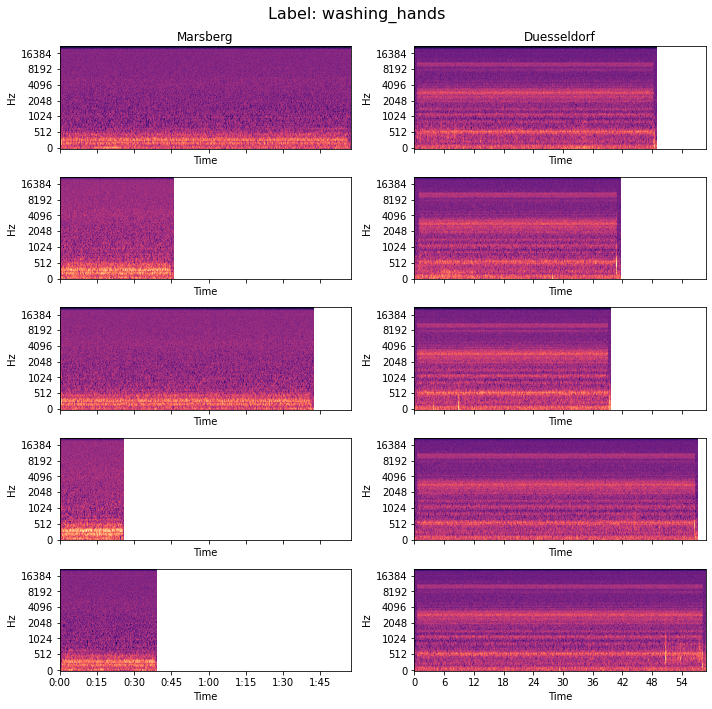

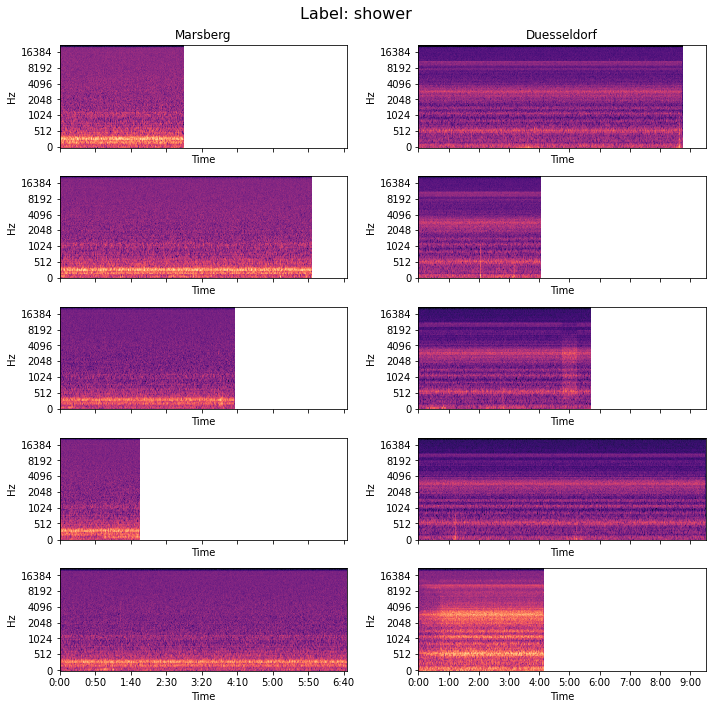

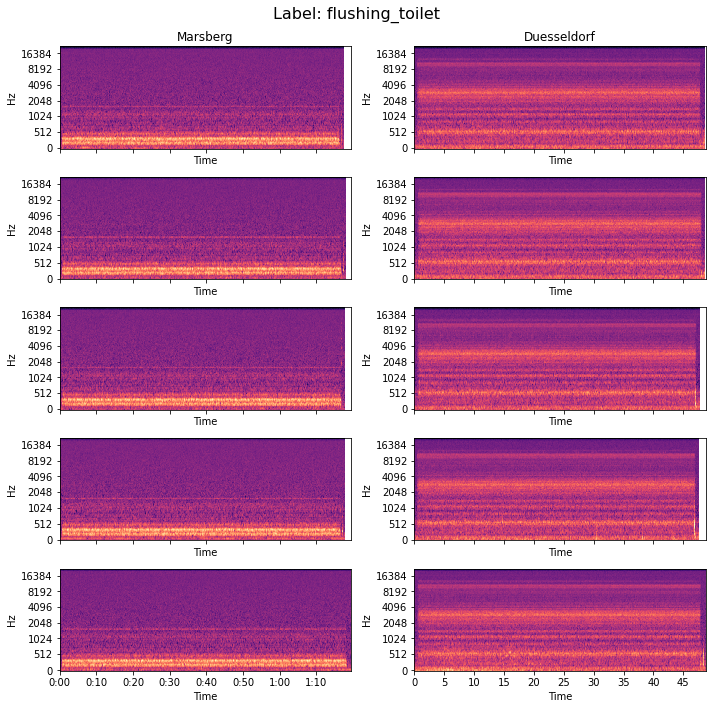

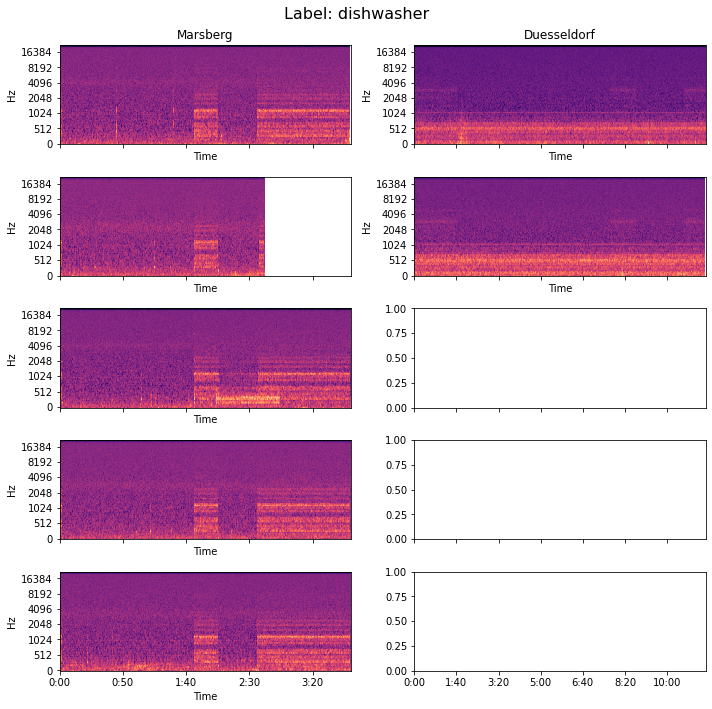

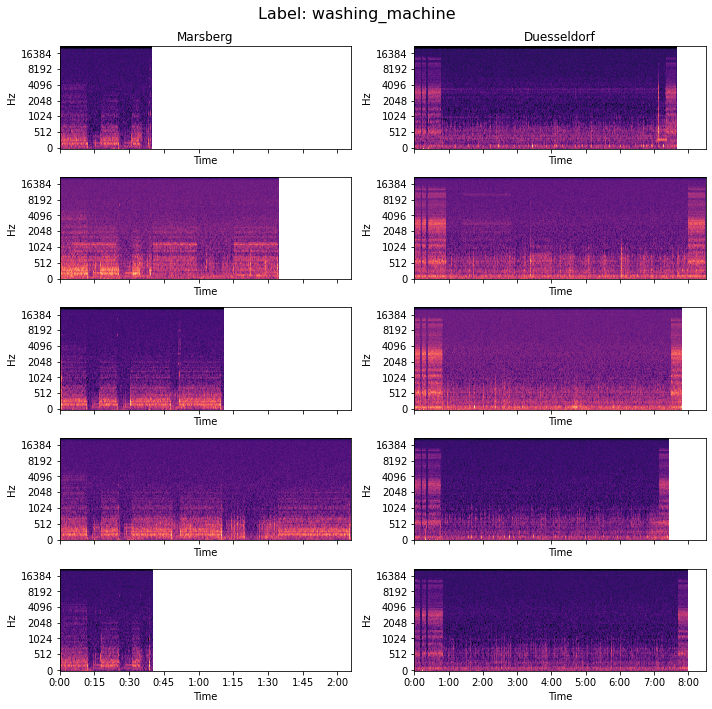

In [7]:
# Generate mel spectrograms for five random samples for label washing_hands, for each environment
for label in labels:
    fig, ax = plt.subplots(nrows=5, ncols=2, sharex='col', figsize=(10, 10))

    samples_left = get_label_samples(5, label, dataframe_marsberg)
    samples_right = get_label_samples(5, label, dataframe_duesseldorf)

    for index, sample in enumerate(samples_left.to_dict("records")):
        generate_mel_spectrogram(index, 0, sample["path"], sample["label"], sample["environment"], ax)

    for index, sample in enumerate(samples_right.to_dict("records")):
        generate_mel_spectrogram(index, 1, sample["path"], sample["label"], sample["environment"], ax)

    ax[0][0].set_title("Marsberg")
    ax[0][1].set_title("Duesseldorf")
    fig.suptitle(f'Label: {label}', fontsize=16)
    plt.tight_layout()